### Basic Multi-Task Lasso Regression with Lists

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import MultiTaskLasso

In [2]:
x = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
y = [[1],[4],[9],[16],[25],[36],[49],[64],[81],[100]]

In [3]:
model = MultiTaskLasso(alpha=0.01)
model.fit(x, y)

MultiTaskLasso(alpha=0.01)

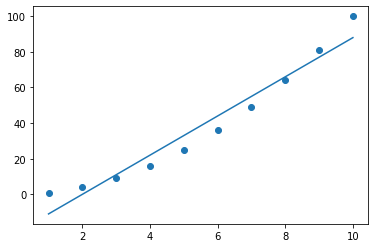

In [4]:
plt.scatter(x, y)
plt.plot(x, model.predict(x))
plt.show() 

In [5]:
pred = model.predict([[13]])[0]
print(pred) #Multi-Task Lasso Regression failed in predicting the square of the 13 value

[120.99090909]


### Multi-TaskLasso Regression using Pandas

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import MultiTaskLasso

In [7]:
data = pd.read_csv('datasets/lr_data.csv')

X = data.iloc[:, 0].values.reshape(-1, 1) 
Y = data.iloc[:, 1].values.reshape(-1, 1) 

clf = MultiTaskLasso(alpha=0.01)
clf.fit(X, Y)
Y_pred = clf.predict(X)

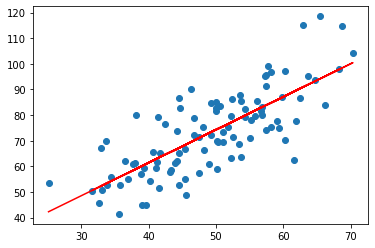

In [8]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

### Multi-Task Lasso Regression on Images

In [9]:
import os, cv2
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import MultiTaskLasso

In [10]:
data = []
labels = []
path1 = "datasets/dogs-vs-cats/cats/"
random.shuffle(os.listdir(path1))
for imagepaths in tqdm(os.listdir(path1)[:200]):
    imagepath = path1 + imagepaths
    image = cv2.imread(imagepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(64,64)).flatten()
    data.append(image)
    labels.append(0) 

path2 = "datasets/dogs-vs-cats/dogs/"
random.shuffle(os.listdir(path2))
for imagepaths in tqdm(os.listdir(path2)[:200]):
    imagepath = path2 + imagepaths
    image = cv2.imread(imagepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(64,64)).flatten()
    data.append(image)
    labels.append(1) 

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 600.65it/s]


In [11]:
data = np.array(data)
labels = np.array(labels)

In [12]:
print(f"Length of Dog images are : {sum(labels)}")
print(f"Length of Cat images are : {len(labels) - sum(labels)}")

Length of Dog images are : 200
Length of Cat images are : 200


In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.25, shuffle=True)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(300, 4096) (100, 4096) (300,) (100,)


In [14]:
clf = MultiTaskLasso(alpha=0.01)
clf.fit(xtrain, np.expand_dims(ytrain,axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1912: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22479842806528416, tolerance: 0.007491666666666663
  cd_fast.enet_coordinate_descent_multi_task(


MultiTaskLasso(alpha=0.01)

In [15]:
from sklearn.metrics import accuracy_score

ypred = clf.predict(xtest)
ypred = (ypred > 0.5)
acc = accuracy_score(ytest, ypred)
print(acc)

0.55


[[0.81711492]]
[[0.82581066]]


Text(0.5, 1.0, 'Predicted Label: Dog')

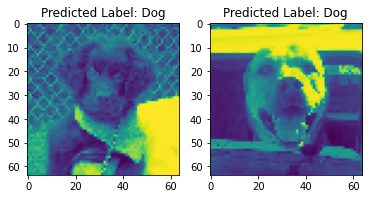

In [16]:
import matplotlib.pyplot as plt

ypred1 = clf.predict([xtest[0]])
print(ypred1)
if ypred1 > 0.5:
    label1 = 'Predicted Label: Dog'
else:
    label1 = 'Predicted Label: Cat'
    
ypred2 = clf.predict([xtest[59]])
print(ypred2)
if ypred2 > 0.5:
    label2 = 'Predicted Label: Dog'
else:
    label2 = 'Predicted Label: Cat'

image1 = xtest[0].reshape(64,64)
image2 = xtest[59].reshape(64,64)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(image1)
ax.set_title(label1)

ax = fig.add_subplot(1, 2, 2)
plt.imshow(image2)
ax.set_title(label2)

### Multi-Task Lasso Regression for NLP

In [17]:
import os,re
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.linear_model import Lasso

In [18]:
df = pd.read_excel("datasets/movie_review.xlsx")
df.head()

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",negative
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",negative
2,Why does this movie fall WELL below standards?...,negative
3,Wow and I thought that any Steven Segal movie ...,negative
4,"The story is seen before, but that does'n matt...",negative


In [19]:
X = df["Reviews"][:2500]
y = df["Sentiment"][:2500]

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
data_list = []
for text in X:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        data_list.append(text)

<ipython-input-21-5e91e33c57df>:4: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape 

(2500, 23249)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [24]:
model = MultiTaskLasso(alpha=0.01)
model.fit(x_train, np.expand_dims(y_train,axis=1))

MultiTaskLasso(alpha=0.01)

In [25]:
y_pred = model.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = (y_pred > 0.5)
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.806


In [27]:
def text_pred(text):
    text = cv.transform([text]).toarray()
    pred = model.predict(text)[0]
    preds = 0
    if pred[0] > 0.5:
        preds = 1
    print(pred[0])
    label = le.inverse_transform([preds])[0]
    return label

In [28]:
text_pred("This movie sucks and the plot twist was already known")

0.45954985649247754


'negative'

In [29]:
text_pred("Nice movie and the actions are so good")

0.5092691135880777


'positive'